In [1]:
!pip install fastai

     |████████████████████████████████| 194 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 4.5 MB/s  eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
from fastai.vision.all import *

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [47]:
len(df)

800000

In [5]:
y = df['label']
x = df.fillna(0)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
y = x_test['label']
x = x_test.fillna(0)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

In [10]:
len(x_test)

8000

In [11]:
x_test.to_csv('subset.csv')

In [12]:
embedding=list(x_test.caption_embedding)

In [22]:
value=embedding[0].split(',')

In [29]:
value = [float(i) for i in value]

In [30]:
type(value[0])

float

In [15]:
def get_caption_embedding(caption_embedding):
    value=caption_embedding.split(',')
    value.pop(0)
    embedding_val = [float(i) for i in value]
    return embedding_val

In [16]:
def get_x(r): return r['img']
def get_y(r): return get_caption_embedding(r['caption_embedding'])

In [39]:
dblocks = DataBlock((ImageBlock,RegressionBlock),
                       get_x= get_x,
                       get_y = get_y,
                       batch_tfms=[*aug_transforms(size=(240,320)),Normalize.from_stats(*imagenet_stats)])
dls=datablocks.dataloaders(x_test)

In [40]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [41]:
doc(dls.show_batch)

TfmdDL.show_batch [source] TfmdDL.show_batch ( b = None , max_n = 9 , ctxs = None , show = True , unique = False , ** kwargs ) 
 
 Show b (defaults to one_batch ), a list of lists of pipeline outputs (i.e. output of a DataLoader ) 
 Show in docs

In [42]:
xb,yb = dls.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 300, 300]), torch.Size([64, 300]))

In [62]:
learn = cnn_learner(dls, resnet18, y_range=(0,1))
learn.metrics = partial(accuracy_multi, thresh=0.5,sigmoid=True)

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.033113110810518265)

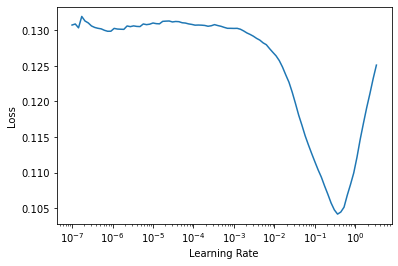

In [56]:
learn.lr_find()

In [63]:
lr = 1e-2
learn.fine_tune(3, lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.062785,0.029331,0.986700,00:17


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.026534,0.025258,0.986629,00:21
1,0.025207,0.023954,0.986041,00:21
2,0.023460,0.022836,0.986494,00:21


In [46]:
dls.loss_func

FlattenedLoss of MSELoss()

In [64]:
test_csv=pd.read_csv('test.csv')

In [65]:
test_csv.head()

,caption,img,label,caption_embedding
0,captions_resized_1M/cities_instagram/melbourne/1486702110666329801.txt,img_resized_1M/cities_instagram/melbourne/1486702110666329801.jpg,melbourne,",0.19323726165277183,0.5821054885893562,0.4203643543959328,0.4834826326360428,0.45566613191076694,0.6136176447657271,0.7752127405155324,0.5445787619546445,0.5415662736949097,0.2908907207508917,0.364949333278376,0.9999739849696248,0.5578780320330443,0.03421185071603339,0.46676367374005395,0.41716879124769085,0.2687001116866161,0.6761348178064936,0.6699696129976381,0.5254786086485993,0.7015073907246783,0.4352273710850132,0.22807191196501847,0.5404667492032558,0.5756435271296144,0.43182294899130125,0.33321492367710237,0.291170856699384,0.7557432283456254,0.3844337187440107,0.12957036979555211..."
1,captions_resized_1M/cities_instagram/miami/1490864453524460292.txt,img_resized_1M/cities_instagram/miami/1490864453524460292.jpg,miami,",0.07843410054901163,0.39235080203980444,0.40945827408431273,0.5550069825043077,0.08622472523054406,0.7007693412983952,0.8060031045549375,0.6807698181285925,0.6091550223445689,0.5443529603484007,0.5551936330403232,0.7561394540869875,0.4972557678576635,0.46868777733239286,0.1411344652145677,0.7462742873623305,0.4469884993288481,0.6170274532013277,0.879568388261727,0.6803307187625645,0.3776233203483167,0.6937810065933875,0.22902556530360252,0.6411036165948221,0.6348442179127598,0.7482868070338059,0.26869761855281593,0.6452400278136187,0.3704650210227213,0.7439322128275759,0.08359758535662344..."
2,captions_resized_1M/cities_instagram/newyork/1489951114383913469.txt,img_resized_1M/cities_instagram/newyork/1489951114383913469.jpg,newyork,",0.4791264830423446,0.4744132244129099,0.1355349148247237,0.5587177214476529,0.5207404514557475,0.7745324657647908,0.6340462408657795,0.31919649085125285,0.7653360125560651,0.8442301263253715,0.8930137491923963,0.9802971502178397,0.7219438493828203,0.4968212878703541,0.39064576311604204,0.928780608921437,0.4072659244991246,0.8266048861631798,0.8725491347356341,0.6727901115017282,0.8397372925170182,0.6021110296503521,0.1842204553317996,0.23372946913459824,0.5533450416483952,0.4366517182434896,0.45165244067134275,0.3924069189842192,0.6738696445193451,0.492629050166856,0.40484866510521245,0.6..."
3,captions_resized_1M/cities_instagram/chicago/1487200400976535640.txt,img_resized_1M/cities_instagram/chicago/1487200400976535640.jpg,chicago,",0.34636080419220644,0.6489453347010642,0.4629829907355607,0.2459872174951865,0.3472232467190792,0.6997743997131484,0.7263108838148523,0.47694066074482694,0.22272645468117905,0.2731269948142443,0.699008859137647,0.5430594766424869,0.4621317265401274,0.5915128647516655,0.5982032431895467,0.47898899540287393,0.533815574419572,0.4735121829558077,0.7366609349246526,0.031696871527050315,0.3560879160608042,0.5170155762912251,0.7355565436541267,0.47678127019205474,0.4930211260780119,0.15230040508169787,0.320651225868174,0.30133013817625,0.5585572980919428,0.41471426004563955,0.30593272360457324,0..."
4,captions_resized_1M/cities_instagram/sydney/1481115776248216006.txt,img_resized_1M/cities_instagram/sydney/1481115776248216006.jpg,sydney,",0.2172442898213641,0.32654037705049166,0.2743930263896718,0.5777201479500724,0.4177181994188188,0.8224266749010662,0.4413415325532105,0.25286509725049056,0.6474884224592155,0.4939959149132339,0.35054788257837693,0.9565334372782279,0.5539341051609926,0.396425687869841,0.20496792663304322,0.7987824937333446,0.34267656969726695,0.5027504660462957,0.49037230749944055,0.36133142944184043,0.5773315131627842,0.37600509014082767,0.2866528756075421,0.0,0.5457490422624365,0.4906595845205608,0.34883384769046816,0.3439022230132021,0.3961620642504379,0.3492321999852224,0.26454789054285427,0.7724877896..."


In [69]:
test_dl = dls.test_dl(test_csv,with_labels=True)

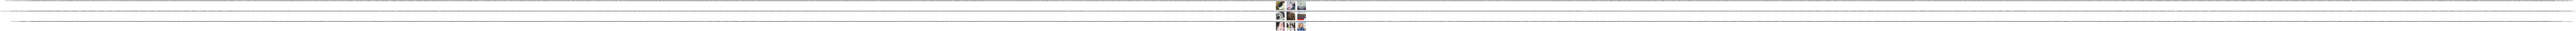

In [70]:
test_dl.show_batch()

In [71]:
preds = learn.get_preds(dl=test_dl)
learn.validate(dl=test_dl)

(#2) [0.022941404953598976,0.9872630834579468]

In [74]:
doc(learn.validate)

Learner.validate [source] Learner.validate ( ds_idx = 1 , dl = None , cbs = None ) 
 
 Validate on dl with potential new cbs . 
 Show in docs

In [72]:
preds[0].shape

torch.Size([140000, 300])

In [76]:
preds[0][1]

tensor([0.3958, 0.4361, 0.3816, 0.4872, 0.4924, 0.7393, 0.5918, 0.5071, 0.5754,
        0.4769, 0.4998, 0.7953, 0.5640, 0.3236, 0.2978, 0.5548, 0.3569, 0.6794,
        0.6716, 0.4541, 0.6099, 0.4888, 0.3038, 0.3475, 0.5437, 0.4580, 0.4330,
        0.4668, 0.6103, 0.4691, 0.2097, 0.6494, 0.5678, 0.5362, 0.4226, 0.6961,
        0.5755, 0.4846, 0.3563, 0.6007, 0.6037, 0.5718, 0.5328, 0.4260, 0.5319,
        0.4925, 0.5243, 0.4863, 0.6726, 0.4380, 0.5839, 0.6359, 0.6218, 0.5001,
        0.4502, 0.3424, 0.6678, 0.5538, 0.5997, 0.4965, 0.4656, 0.6123, 0.5783,
        0.3568, 0.5179, 0.4997, 0.6358, 0.5593, 0.3964, 0.5025, 0.4694, 0.5542,
        0.2802, 0.4950, 0.4719, 0.2999, 0.6139, 0.4981, 0.4715, 0.6111, 0.3697,
        0.5583, 0.3469, 0.5996, 0.4119, 0.4418, 0.4431, 0.7549, 0.3896, 0.4830,
        0.4180, 0.5879, 0.4607, 0.4108, 0.4507, 0.4507, 0.6142, 0.4565, 0.4367,
        0.5771, 0.4393, 0.5022, 0.4499, 0.6639, 0.5300, 0.6130, 0.5117, 0.4056,
        0.3862, 0.6161, 0.5678, 0.5229, 